# Model Energy-Time Entanglement

In [1]:
#Preliminaries
#Specify path to whitepeaks framework
whitePeaksFolder='C:\\Users\\s4schwar\\Documents\\GitHub\\whitepeaks\\'

#Current notebook directory
notebookDirectory=%pwd

#Change to whitepeaks folder, load package and change back to notebookDirectory
from os import chdir
chdir( whitePeaksFolder )
from whitepeaks import *
chdir( notebookDirectory )

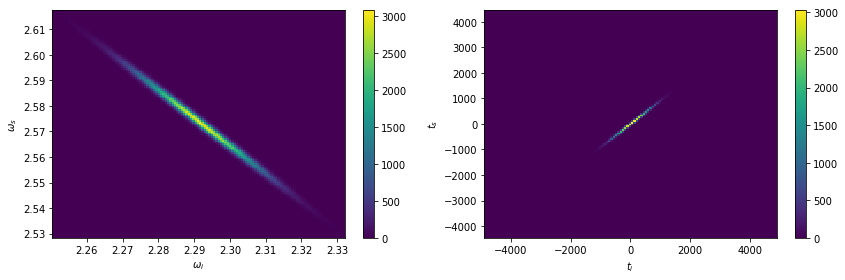

In [2]:
add_poisson_noise=True
Nphotons=3000

#Angular Frequency (fs^-1) and Bandwidth (fs^-1)
wi0,sigma_i=w2f(0.822),0.01166 
ws0,sigma_s=w2f(0.732),0.01275 

#Frequency Correlations
rho=-0.995

#Spectral phase (fs^2) on the signal, idler, and pump.
#Ai,As,Ap=1e5,1e5,0
#Ai,As,Ap=-1e5,1e5,0
Ai,As,Ap=-0,0,0

#Generate frequency-time states
Wi,Ws,F=gaussian_state(wi0,ws0,sigma_i,sigma_s,rho,Ai=Ai,As=As,Ap=Ap
                                        ,Nsigma=[1.5,1.5],Nsamples=[2**7,2**7])
Ti,Ts,ftt=fft_state_2D(Wi,Ws,F)

#Calculate joint spectral intensity and joint temporal intensity
if add_poisson_noise:
    Iww=np.double(np.random.poisson(Nphotons*np.abs(F)**2))
    Itt=np.double(np.random.poisson(Nphotons*(np.abs(ftt)
                                                     /np.max(np.abs(ftt)))**2))
else:
    Iww=np.double(np.abs(F)**2)
    Itt=np.double(np.abs(ftt)**2/np.max(np.abs(ftt)**2))

#MAKE PLOTS
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax=ax.reshape(-1)
S1=ax[0].pcolormesh(Wi,Ws,Iww)
S2=ax[1].pcolormesh(Ti,Ts,Itt)
[fig.colorbar([S1,S2][i],ax=ax[i]) for i in range(2)]  
ax[0].set_xlabel(r'$\omega_i$')
ax[0].set_ylabel(r'$\omega_s$') 
ax[1].set_xlabel(r'$t_i$') 
ax[1].set_ylabel(r'$t_s$')
plt.tight_layout()
plt.show()